In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sys
import tensorflow as tf
!pip install -q shap
import shap
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score 

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

from ipywidgets import interact
from sklearn.neural_network import MLPClassifier

# from eli5.sklearn import PermutationImportance
# from eli5.permutation_importance import get_score_importances

print('Python version:', sys.version.split(' ')[0])

print('TensorFlow version', tf.__version__)

# Find out NVIDIA GPU model (randomly assigned by Colab)
# Deep learning performance: K80 < P4 < T4 < P100
# https://ai-benchmark.com/ranking_deeplearning.html
gpu = !nvidia-smi -L
gpu = gpu[0].split(' (')[0]
if 'failed' in gpu:
  print('GPU: None')
else:
  print(gpu, '\n')
  # GPU information
  !nvidia-smi

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Occupancy.csv
Python version: 3.7.13
TensorFlow version 2.8.2
GPU: None


In [15]:
raw_data = pd.read_csv('/kaggle/input/Occupancy.csv')

print("Data Set First Five Values")
print(120 * '=')
print(raw_data.head(10))
print('\n\n')

print("Data Set Info")
print(60 * '=')
print(raw_data.info())
print('\n\n')


Data Set First Five Values
                  date  Temperature  Humidity       Light         CO2  \
0  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
1  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
2  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
3  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
4  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   
5  2015-02-02 14:23:59      23.7600    26.260  568.666667  790.000000   
6  2015-02-02 14:25:00      23.7300    26.290  536.333333  798.000000   
7  2015-02-02 14:25:59      23.7540    26.290  509.000000  797.000000   
8  2015-02-02 14:26:59      23.7540    26.350  476.000000  803.200000   
9  2015-02-02 14:28:00      23.7360    26.390  510.000000  809.000000   

   HumidityRatio  Occupancy  
0       0.004764          1  
1       0.004773          1  
2       0.004765          1  
3       0.004744          1  
4       0.004767   

In [13]:
fig = px.box(raw_data, x='Occupancy', y='Temperature')
fig.update_layout(xaxis_title_text='Occupancy')
fig.show()



In [ ]:
fig = px.box(raw_data, x='Occupancy', y='CO2')
fig.update_layout(
    xaxis_title_text='Occupancy',
)
fig.show()

In [ ]:
fig = px.box(raw_data, x='Occupancy', y='Humidity')
fig.update_layout(
    xaxis_title_text='Occupancy'
)
fig.show()

In [ ]:
fig = px.box(raw_data, x='Occupancy', y='Light')
fig.update_layout(
    xaxis_title_text='Occupancy'
)
fig.show()

y corresponde a todas as ocupacao do arquivo

x corresponde a todas as outras colunas menos date e Occupancy



In [16]:
y = raw_data['Occupancy']
X = raw_data.drop(['date', 'Occupancy'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.40, random_state = 31)
input_shape = [X_train.shape[1]]

input_shape_test = [X_test.shape[1]]


print(f'Train Shape: {input_shape}, Test Shape: {input_shape_test}')

Train Shape: [5], Test Shape: [5]


In [17]:
model = keras.Sequential ([
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(255, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1, activation='sigmoid')
])

model.compile (
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
15/15 [==============================] - 6s 102ms/step - loss: 0.2949 - binary_accuracy: 0.9080 - val_loss: 1.1521 - val_binary_accuracy: 0.3552
Epoch 2/200
15/15 [==============================] - 1s 48ms/step - loss: 0.1443 - binary_accuracy: 0.9792 - val_loss: 0.6090 - val_binary_accuracy: 0.6359
Epoch 3/200
15/15 [==============================] - 1s 55ms/step - loss: 0.1148 - binary_accuracy: 0.9835 - val_loss: 0.7653 - val_binary_accuracy: 0.5674
Epoch 4/200
15/15 [==============================] - 1s 52ms/step - loss: 0.1022 - binary_accuracy: 0.9841 - val_loss: 0.4917 - val_binary_accuracy: 0.7465
Epoch 5/200
15/15 [==============================] - 1s 38ms/step - loss: 0.0918 - binary_accuracy: 0.9837 - val_loss: 0.4193 - val_binary_accuracy: 0.8381
Epoch 6/200
15/15 [==============================] - 1s 42ms/step - loss: 0.0889 - binary_accuracy: 0.9832 - val_loss: 0.3120 - val_binary_accuracy: 0.9248
Epoch 7/200
15/15 [==============================] - 1s 49ms/st

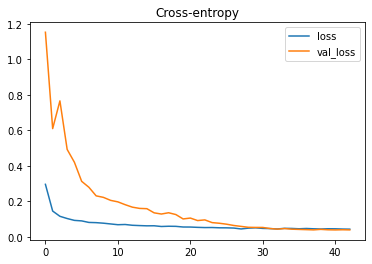

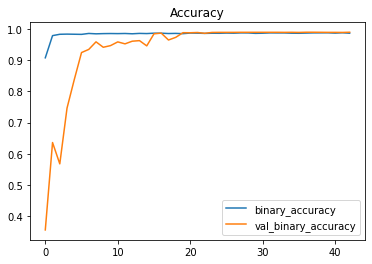

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

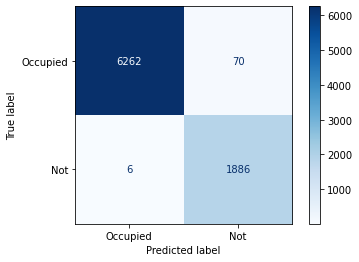

In [19]:
y_pred = np.around(model.predict(X_test))
cm = confusion_matrix(y_test, y_pred)
labels = ['Occupied' , 'Not']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
print('Precisão bruta')
print(accuracy_score(y_test, y_pred))

print('Precisão equilibrada')
print(balanced_accuracy_score(y_test, y_pred)) 

Precisão bruta
0.9907587548638133
Precisão equilibrada
0.992886896851991


In [26]:

temp = 23.7
hum = 26.272
luz = 585.2
co = 749.2
humiHa = 0.004

# temp = 21.39
# hum = 23.917
# luz = 0.0
# co = 603.5
# humiHa = 0.003

list = [temp, hum, luz, co, humiHa]
t = np.asmatrix(list)

result = model.predict(t)

print(result[0])

[0.9654075]
